In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_validate
import seaborn as sns
import matplotlib.pyplot as plt
seed = 42
np.random.seed(seed)

In [2]:
df = pd.read_csv('poster_presentation.csv', index_col=0)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,Label,Label_numeric
0,-0.045036,0.032603,0.006723,-0.019156,-0.070916,-0.122676,-0.096796,-0.045036,-0.019156,0.006723,...,-0.743796,-0.666156,-0.717916,-0.743796,-0.769676,-0.847316,-0.795556,-0.769676,N,1
1,-0.200316,-0.200316,-0.200316,-0.122676,-0.122676,-0.148556,-0.200316,-0.226196,-0.226196,-0.174436,...,-0.666156,-0.640276,-0.666156,-0.588516,-0.588516,-0.588516,-0.588516,-0.614396,N,1
2,-0.303836,-0.200316,-0.200316,-0.174436,-0.252076,-0.303836,-0.277956,-0.252076,-0.252076,-0.252076,...,-0.355596,-0.303836,-0.329716,-0.407356,-0.459116,-0.407356,-0.407356,-0.329716,N,1
3,-0.226196,-0.226196,-0.226196,-0.174436,-0.174436,-0.200316,-0.200316,-0.381476,-0.277956,-0.277956,...,-0.769676,-0.795556,-0.692036,-0.666156,-0.614396,-0.640276,-0.717916,-0.743796,N,1
4,-0.122676,-0.045036,-0.045036,-0.122676,-0.122676,-0.148556,-0.148556,-0.122676,-0.122676,-0.122676,...,-0.692036,-0.666156,-0.640276,-0.640276,-0.743796,-0.717916,-0.717916,-0.666156,N,1


In [4]:
print(df.shape)
print(df['Label'].value_counts())
print(df['Label_numeric'].value_counts())

(107400, 202)
Label
N    89429
Q     7999
V     6392
S     2805
F      775
Name: count, dtype: int64
Label_numeric
1    89429
2     7999
4     6392
3     2805
0      775
Name: count, dtype: int64


In [5]:
X = df.iloc[:, :200].to_numpy()
y = df.iloc[:, -1].to_numpy()
print(X.shape, y.shape)

(107400, 200) (107400,)


In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,Label,Label_numeric
0,-0.045036,0.032603,0.006723,-0.019156,-0.070916,-0.122676,-0.096796,-0.045036,-0.019156,0.006723,...,-0.743796,-0.666156,-0.717916,-0.743796,-0.769676,-0.847316,-0.795556,-0.769676,N,1
1,-0.200316,-0.200316,-0.200316,-0.122676,-0.122676,-0.148556,-0.200316,-0.226196,-0.226196,-0.174436,...,-0.666156,-0.640276,-0.666156,-0.588516,-0.588516,-0.588516,-0.588516,-0.614396,N,1
2,-0.303836,-0.200316,-0.200316,-0.174436,-0.252076,-0.303836,-0.277956,-0.252076,-0.252076,-0.252076,...,-0.355596,-0.303836,-0.329716,-0.407356,-0.459116,-0.407356,-0.407356,-0.329716,N,1
3,-0.226196,-0.226196,-0.226196,-0.174436,-0.174436,-0.200316,-0.200316,-0.381476,-0.277956,-0.277956,...,-0.769676,-0.795556,-0.692036,-0.666156,-0.614396,-0.640276,-0.717916,-0.743796,N,1
4,-0.122676,-0.045036,-0.045036,-0.122676,-0.122676,-0.148556,-0.148556,-0.122676,-0.122676,-0.122676,...,-0.692036,-0.666156,-0.640276,-0.640276,-0.743796,-0.717916,-0.717916,-0.666156,N,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=42, stratify=y_test, shuffle=True)

In [8]:
print(X_train.shape, X_test.shape, X_val.shape)

(75180, 200) (21587, 200) (10633, 200)


In [9]:
dt = {
    0:'F',
    1:'N',
    2:'Q',
    3:'S',
    4:'V'
}

In [26]:
from sklearn.decomposition import PCA
X_proj = PCA(n_components=0.90).fit_transform(X)
print(X_proj.shape)

(107400, 7)


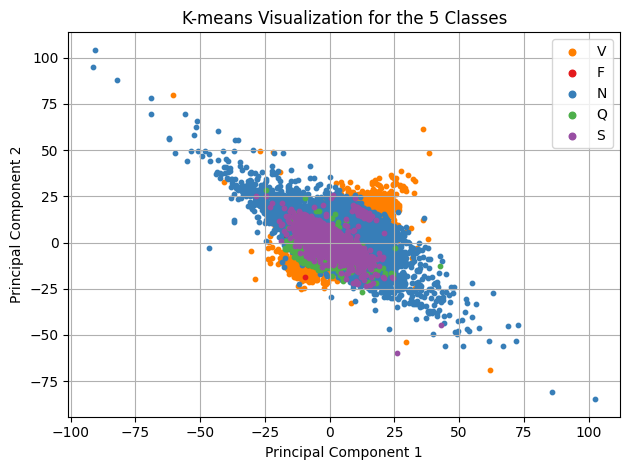

In [52]:
colors = sns.color_palette("Set1", 5)
for i in [4,0,1,2,3]:
    plt.scatter(X_proj[:, 0][y==i], X_proj[:, 1][y==i], label=dt[i], s=10, c=[colors[i]])

# plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y)
# Add labels, title, and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Visualization for the 5 Classes')
plt.legend(loc="best", markerscale=1.5, fontsize='medium', frameon=True)
plt.grid(True)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show plot
plt.show()

In [51]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

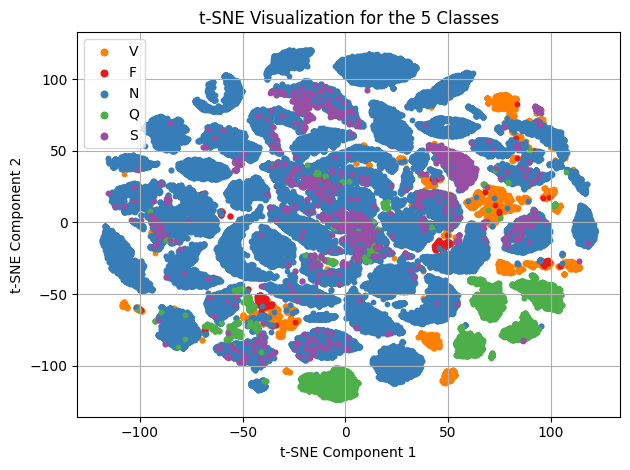

In [56]:
colors = sns.color_palette("Set1", 5)
for i in [4,0,1,2,3]:
    plt.scatter(X_tsne[:, 0][y==i], X_tsne[:, 1][y==i], label=dt[i], s=10, c=[colors[i]])

# plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y)
# Add labels, title, and legend
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization for the 5 Classes')
plt.legend(loc="best", markerscale=1.5, fontsize='medium', frameon=True)
plt.grid(True)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show plot
plt.show()

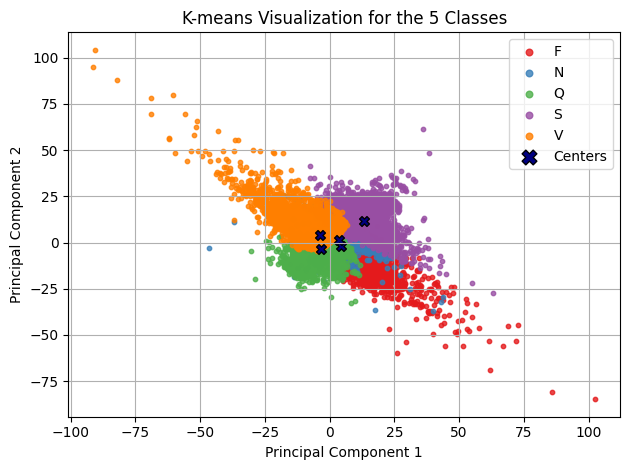

In [53]:
from sklearn.cluster import KMeans


# Intialize k-means with five clusters and fit it to 'epochs_data'

kmeans = KMeans(n_clusters=5)
kmeans.fit(X_proj)

# find the cluster centers and the assigned cluster labels for each epoch
centers = kmeans.cluster_centers_
predicted_labels = kmeans.labels_

# Set a custom color palette for the clusters
colors = sns.color_palette("Set1", 5)

# Plot the data points for each cluster
for i, color in zip(range(5), colors):
    plt.scatter(X_proj[predicted_labels == i, 0], X_proj[predicted_labels == i, 1], label=dt[i], s=10, alpha=0.8, c=[color])

# Plot the cluster centers with black border
plt.scatter(centers[:, 0], centers[:, 1], c="navy", s=50, marker='X', edgecolors='black', linewidths=1, label='Centers')

# Add labels, title, and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Visualization for the 5 Classes')
plt.legend(loc="best", markerscale=1.5, fontsize='medium', frameon=True)
plt.grid(True)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show plot
plt.show()

Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix'):
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap=plt.cm.Blues)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.xticks(np.arange(len(classes)) + 0.5, classes)
    plt.yticks(np.arange(len(classes)) + 0.5, classes)
    plt.show()

Test Accuracy:  0.9785519062398665


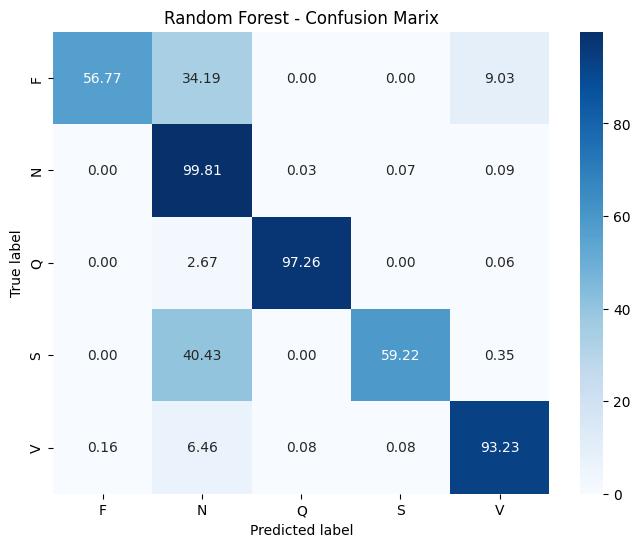

Classification Report for Test Set:
              precision    recall  f1-score   support

           0     0.9778    0.5677    0.7184       155
           1     0.9778    0.9981    0.9878     17975
           2     0.9955    0.9726    0.9840      1608
           3     0.9625    0.5922    0.7333       564
           4     0.9724    0.9323    0.9519      1285

    accuracy                         0.9786     21587
   macro avg     0.9772    0.8126    0.8751     21587
weighted avg     0.9784    0.9786    0.9768     21587



In [15]:
predicted_labels = rfc.predict(X_test)
print("Test Accuracy: ", (predicted_labels==y_test).sum()/len(y_test))
plot_confusion_matrix(confusion_matrix(y_test, predicted_labels), np.array(['F','N','Q','S','V']), "Random Forest - Confusion Marix")
print("Classification Report for Test Set:")
print(classification_report(y_test, predicted_labels, digits=4))

In [26]:
from sklearn.linear_model import LogisticRegression


def evaluate_classifier(clf, X, y, scoring, parameters, n_splits=10):
    # Create StratifiedKFold validation
    cv = StratifiedKFold(n_splits=n_splits)

    # Instantiate a GridSearchCV object
    grid_search = GridSearchCV(clf, param_grid=parameters, cv=cv, scoring=scoring)

    # Fit the model
    grid_search.fit(X, y)

    # Print the best parameters and score
    print('Best parameters: ', grid_search.best_params_)
    print('Best score: ', grid_search.best_score_)
    return grid_search


parameters = {'C': [10, 1, 0.1, 0.01]}
scoring = 'accuracy'

# Intiate a SVM classifier
clf_l1 = LogisticRegression(solver='saga', penalty='l1')
grid_search_l1 = evaluate_classifier(clf_l1, X_train, y_train, scoring, parameters)

/home/csci5980/tirup007/.conda/envs/my_pytorch_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/csci5980/tirup007/.conda/envs/my_pytorch_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/csci5980/tirup007/.conda/envs/my_pytorch_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/csci5980/tirup007/.conda/envs/my_pytorch_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/csci5980/tirup007/.conda/envs/my_pytorch_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

Best parameters:  {'C': 10}
Best score:  0.9374567704176643


/home/csci5980/tirup007/.conda/envs/my_pytorch_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [27]:
clf_l2 = LogisticRegression(solver='saga', penalty='l2')
grid_search_l2 = evaluate_classifier(clf_l2, X_train, y_train, scoring, parameters)

/home/csci5980/tirup007/.conda/envs/my_pytorch_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/csci5980/tirup007/.conda/envs/my_pytorch_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/csci5980/tirup007/.conda/envs/my_pytorch_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/csci5980/tirup007/.conda/envs/my_pytorch_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/csci5980/tirup007/.conda/envs/my_pytorch_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

Best parameters:  {'C': 10}
Best score:  0.9374567704176643


/home/csci5980/tirup007/.conda/envs/my_pytorch_env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test Accuracy:  0.9361189604854774


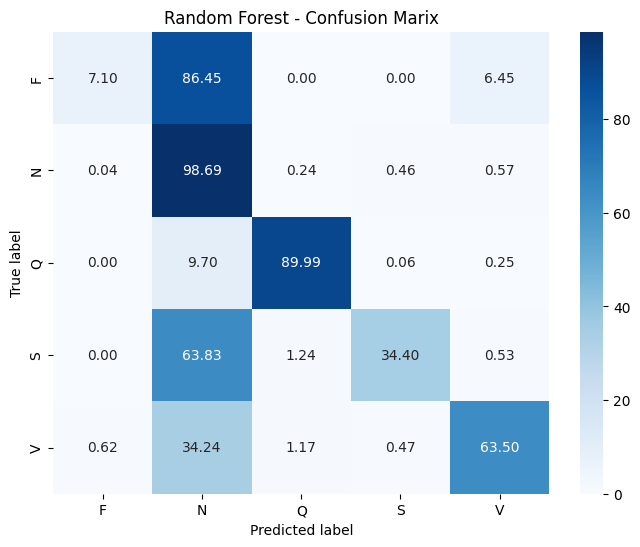

Classification Report for Test Set:
              precision    recall  f1-score   support

           0     0.4074    0.0710    0.1209       155
           1     0.9421    0.9869    0.9640     17975
           2     0.9570    0.8999    0.9276      1608
           3     0.6855    0.3440    0.4581       564
           4     0.8727    0.6350    0.7351      1285

    accuracy                         0.9361     21587
   macro avg     0.7730    0.5874    0.6411     21587
weighted avg     0.9285    0.9361    0.9284     21587



In [28]:
predicted_labels = grid_search_l1.predict(X_test)
print("Test Accuracy: ", (predicted_labels==y_test).sum()/len(y_test))
plot_confusion_matrix(confusion_matrix(y_test, predicted_labels), np.array(['F','N','Q','S','V']), "Logistic Regression L1 - Confusion Marix")
print("Classification Report for Test Set:")
print(classification_report(y_test, predicted_labels, digits=4))

Test Accuracy:  0.9361189604854774


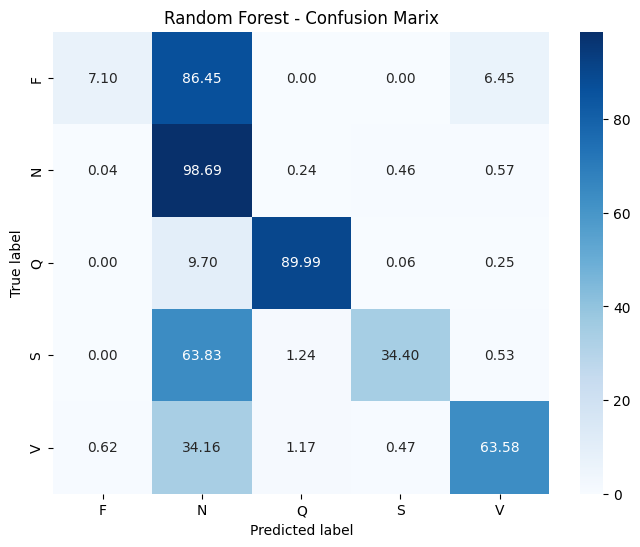

Classification Report for Test Set:
              precision    recall  f1-score   support

           0     0.4074    0.0710    0.1209       155
           1     0.9422    0.9869    0.9640     17975
           2     0.9570    0.8999    0.9276      1608
           3     0.6855    0.3440    0.4581       564
           4     0.8719    0.6358    0.7354      1285

    accuracy                         0.9361     21587
   macro avg     0.7728    0.5875    0.6412     21587
weighted avg     0.9285    0.9361    0.9284     21587



In [29]:
predicted_labels = grid_search_l2.predict(X_test)
print("Test Accuracy: ", (predicted_labels==y_test).sum()/len(y_test))
plot_confusion_matrix(confusion_matrix(y_test, predicted_labels), np.array(['F','N','Q','S','V']), "Logistic Regression L2 - Confusion Marix")
print("Classification Report for Test Set:")
print(classification_report(y_test, predicted_labels, digits=4))